# Predicting the Sale Price: Linear Regression, RandomForestRegressor and DecisionTreeRegressor

## 0. Importing Libraries and Loading Datasets

### 0.1 Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import math
import seaborn as sns

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

### 0.2 Loading the Datasets

In [2]:
train_df = pd.read_csv(r'.\LR\train.csv')
test_df = pd.read_csv(r'.\LR\test.csv')

In [3]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

## 1. Exploratory Data Analysis

### 1.1 Understanding the Datasets

In [5]:
train_df.shape

(1460, 81)

In [6]:
test_df.shape

(1459, 80)

In [7]:
train = train_df.copy()
test = test_df.copy()

In [8]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

#### What are the various columns (or features) of the dataset?

In [10]:
print(list(train.columns))

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

#### Are there any Missing (NaN) Values?

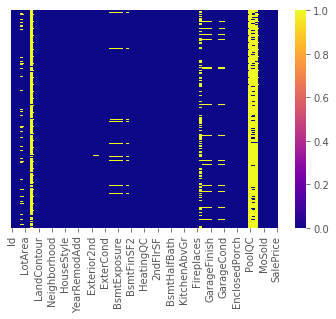

In [11]:
sns.heatmap(train.isnull(),yticklabels=False, cmap='plasma')

In [12]:
train.isnull().sum().sort_values(ascending=False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

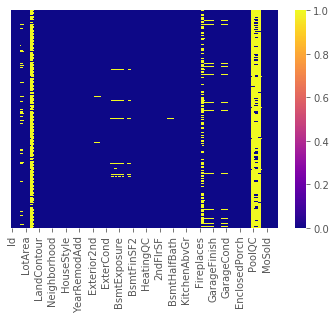

In [13]:
sns.heatmap(test.isnull(),yticklabels=False, cmap='plasma')

In [14]:
test.isnull().sum().sort_values(ascending=False)[0:20]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

**Inference**: Clearly, PoolQC, MiscFeature, Alley and Fence comprise of maximum missing values. For the purpose of the model, it is better not to take these features into account. Regarding other features with few or medium number of missing values, we can fill those samples with the mean of that value for all other non-missing samples.

### 1.2 Understanding the various Features in Training Data

#### Distribution of Target Variable: Sale Price

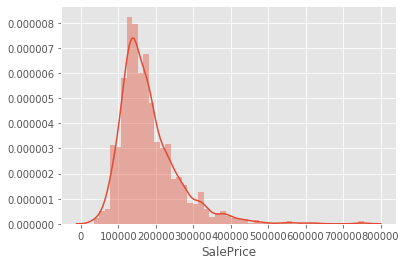

In [15]:
sns.distplot(train['SalePrice'])
plt.show()

In [16]:
print("Skewness: %f"%train['SalePrice'].skew())
print("Kurtosis: %f"%train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Inference**: Most Houses are sold between the range of 1,00,000 to 2,00,000. The peak occurs at somewhere less than 1,50,000. Clearly, SalePrice is not normally distributed. Therefore, to make the distribution look better, we log transform it.

#### Log Transforming SalePrice

Skewness: 0.121335
Kurtosis: 0.809532


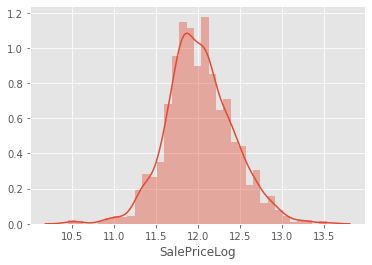

In [17]:
train['SalePriceLog'] = np.log(train['SalePrice'])
sns.distplot(train['SalePriceLog'])
print("Skewness: %f"%train['SalePriceLog'].skew())
print("Kurtosis: %f"%train['SalePriceLog'].kurt())

The above distribution looks much more normalized. 

#### Which features are Numerical?

In [18]:
Numerical = [feature for feature in train.columns if train[feature].dtypes != 'O']
Numerical

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'SalePriceLog']

In [19]:
len(Numerical)

39

There are total of 38 features that are numerical in nature, as listed above.

In [20]:
train[Numerical].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  OpenPorchSF  EnclosedPorch  \
0          2003       196.0         706  ...           61              0   
1          1976         0.0         978  ...            0              0   
2          2002       162.0         486  ...           42              0   
3          1970         0.0         216  ...           35            272   
4          2000       350.0         655  ...           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0          0            0         0        0       2    2008     208500   
1          0            0         0        0       5    2007     181500   
2          0            0         0        0       9    2008     223500   
3          0            0         0        0       2    2006     140000   
4          0            0         0        0      12    2008     250000   

   SalePriceLog  
0     12.247694  
1     12.109011  
2     12.317167  
3     11.849398  
4     12.429216  

[5 rows x 39 columns]

#### Which features are Non-Numerical (or Categorical)?

In [21]:
NonNumerical = [feature for feature in train.columns if train[feature].dtypes == 'O']
NonNumerical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [22]:
len(NonNumerical)

43

There are total of 43 features that are non-numerical in nature, as listed above.

In [23]:
train[NonNumerical].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

### 1.3 Removing Missing Values from Training Data

In [24]:
combined_data = pd.concat((train, test)).reset_index(drop=True)

#### From Numerical Features

In [25]:
numerical_missing = [feature for feature in Numerical if train[feature].isna().sum()>0]
numerical_missing

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [26]:
train[numerical_missing].isna().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [27]:
for feature in numerical_missing:
    median_value=combined_data[feature].median()
    train[feature].fillna(median_value,inplace=True)
    
train[numerical_missing].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

#### From Categorical Features

In [28]:
categorical_missing = [feature for feature in NonNumerical if train[feature].isna().sum()>0]
categorical_missing

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [29]:
train[categorical_missing].isna().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [30]:
for feature in categorical_missing:
    train[feature] = train[feature].fillna('Unknown')

In [31]:
train[categorical_missing].isna().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [32]:
train.isnull().sum().sum()

0

In [33]:
combined_data = pd.concat((train, test)).reset_index(drop=True)

### 1.4 Removing Missing Values from Test Data

#### From Numerical Features

In [34]:
numerical_missing = [feature for feature in Numerical if feature!='SalePrice' and feature!='SalePriceLog' and test[feature].isna().sum()>0]
numerical_missing

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [35]:
test[numerical_missing].isna().sum()

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [36]:
for feature in numerical_missing:
    median_value=combined_data[feature].median()
    test[feature].fillna(median_value,inplace=True)
    
test[numerical_missing].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

#### From Categorical Features

In [37]:
categorical_missing = [feature for feature in NonNumerical if test[feature].isna().sum()>0]
categorical_missing

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [38]:
test[categorical_missing].isna().sum()

MSZoning           4
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [39]:
for feature in categorical_missing:
    test[feature] = train[feature].fillna('Unknown')

In [40]:
test[categorical_missing].isna().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [41]:
test.isnull().sum().sum()

0

In [42]:
combined_data = pd.concat((train, test)).reset_index(drop=True)

### 1.5 Normalizing Numerical Values

First, let's see which Numerical Features show a high Skewness.

In [43]:
for col in Numerical:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train[col].skew()) , '   ' , 'Kurtosis: {:06.2f}'.format(train[col].kurt())  )

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.43     Kurtosis: 021.94
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.68     Kurtosis: 010.14
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

We see that there are a lot of features with skewness > 1. However, by intuitiveness, most of them may not even be used in the model. As of now, we Log Transform just 2 of the features, and will do the same for any other feature if required at a later stage.

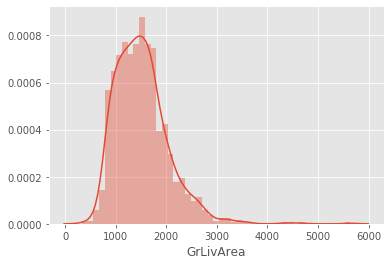

In [44]:
sns.distplot(train['GrLivArea'])

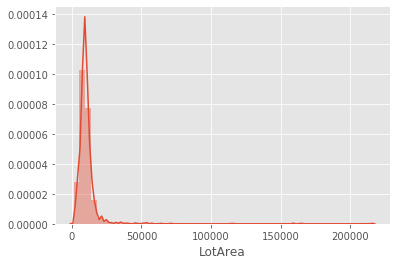

In [45]:
sns.distplot(train['LotArea'])

In [46]:
for df in [train, test]:
    df['GrLivAreaLog'] = np.log(df['GrLivArea'])
    df['LotAreaLog'] = np.log(df['LotArea'])

In [47]:
Numerical = [feature for feature in train.columns if train[feature].dtypes != 'O']

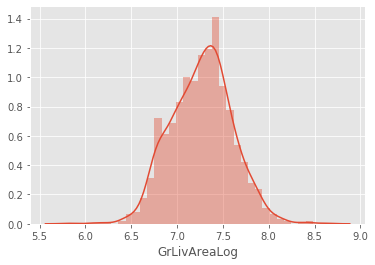

In [48]:
sns.distplot(train['GrLivAreaLog'])

In [49]:
print("Skewness: %f" % train['GrLivAreaLog'].skew())
print("Kurtosis: %f" % train['GrLivAreaLog'].kurt())

Skewness: -0.006995
Kurtosis: 0.282603


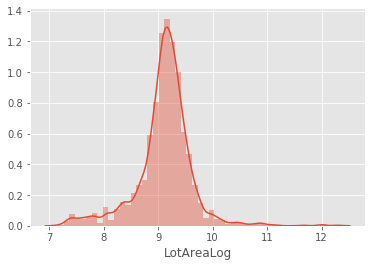

In [50]:
sns.distplot(train['LotAreaLog'])

In [51]:
print("Skewness: %f" % train['LotAreaLog'].skew())
print("Kurtosis: %f" % train['LotAreaLog'].kurt())

Skewness: -0.137994
Kurtosis: 4.713358


Clearly, the plot is much ore normalized now after the log transform

### 1.3 Correlating Numerical Features with SalePrice

#### Correlating Numerical Features with the SalePriceLog

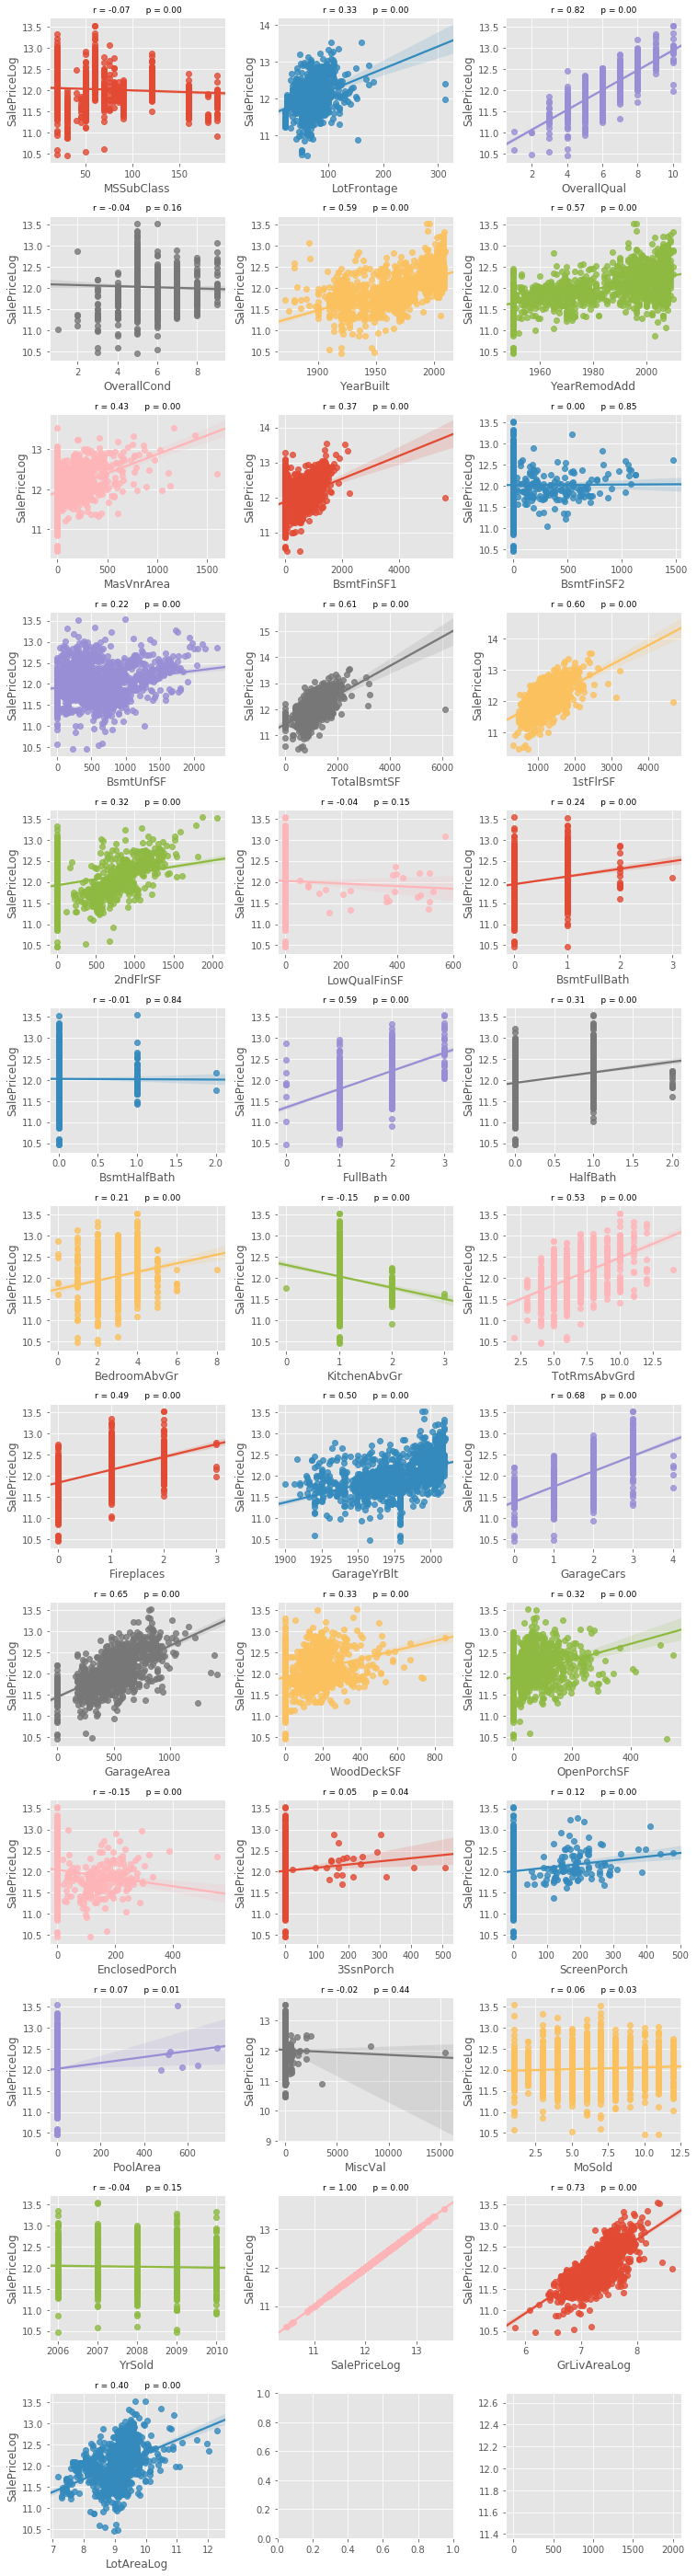

In [52]:
Numerical = [feature for feature in train.columns if train[feature].dtypes != 'O']
nrows = 13
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize = (ncols*3.5, nrows*3))

listoffeatures = Numerical
listoffeatures.remove('SalePrice')
listoffeatures.remove('Id')
listoffeatures.remove('LotArea')
listoffeatures.remove('GrLivArea')

for r in range(0, nrows):
    for c in range(0, ncols):
        i = r*ncols + c
        if i <len(listoffeatures):
            temp = listoffeatures[i]
            sns.regplot(train[temp], train['SalePriceLog'], ax = axs[r][c])
            stp = stats.pearsonr(train[temp], train['SalePriceLog'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=9)
            
plt.tight_layout()    
plt.show() 

#### Identifying Linear Correlations

From the above plots, we observe that the following features have a good correlation with the SalePriceLog -
- OverallQual (0.82)
- YearBlt (0.59)
- TotalBsmtSF (0.61)
- 1stFlrSF (0.60)
- FullBath (0.59)
- TotRmsAbvGrd (0.53)
- GarageCars (0.68)
- GarageArea (0.65)
- GrLivAreaLog (0.73)

A few more features have their correlation between 0.40 to 0.50. We may or may not consider them at a later stage. On the other hand, features with a weak correlation (less than a minimum value) will not be considered while building the model.

#### Removing Outliers

Removing points where despite the overall quality being 10, the sale price were lower

In [53]:
train = train.drop(train[(train['OverallQual']==10) & (train['SalePriceLog']<12.3)].index)

Removing points where despite the Ground Living Area being higher, the sale price were lower

In [54]:
train = train.drop(train[(train['GrLivAreaLog']>8.3) & (train['SalePriceLog']<12.5)].index)

#### Finding Features with Strong Correlation to Target

In [55]:
corr = train.corr()
corr_abs = corr.abs()
target = 'SalePriceLog'
min_corr_value = 0.4

numcols = len(listoffeatures)
ser_corr = corr_abs.nlargest(numcols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_corr_value].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_corr_value].index)

In [56]:
print(ser_corr)

SalePriceLog     1.000000
SalePrice        0.948395
OverallQual      0.821404
GrLivAreaLog     0.737427
GrLivArea        0.725211
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.499311
Fireplaces       0.491998
MasVnrArea       0.430569
LotAreaLog       0.402814
BsmtFinSF1       0.392283
LotFrontage      0.350593
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
LotArea          0.260544
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
Name: SalePriceLog, dtype: float64


In [57]:
print("Numerical Features with Correlation > 0.4")
print(cols_abv_corr_limit)

Numerical Features with Correlation > 0.4
['SalePriceLog', 'SalePrice', 'OverallQual', 'GrLivAreaLog', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'LotAreaLog']


In [58]:
print("Numerical Features with Correlation <= 0.4")
print(cols_bel_corr_limit)

Numerical Features with Correlation <= 0.4
['BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond']


#### Correlation Matrix for Numerical Features
Let's confirm our findings by a correlation matrix

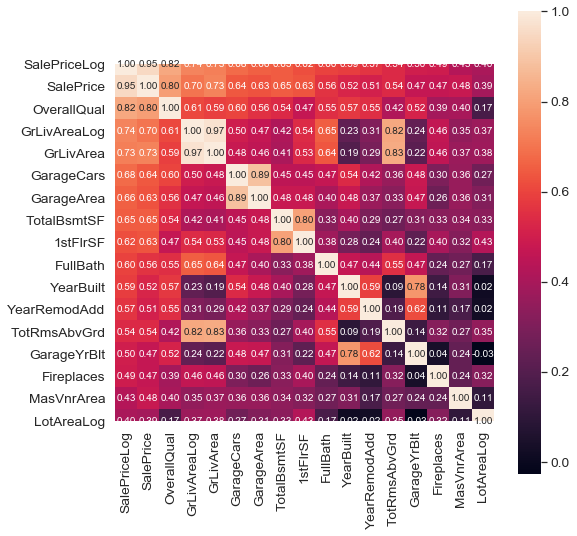

In [59]:
nr_c = len(cols_abv_corr_limit)

corr = train.corr()
corr_abs = corr.abs()
cols = corr_abs.nlargest(nr_c, target)[target].index
cm = np.corrcoef(train[cols].values.T)

plt.figure(figsize=(nr_c/2, nr_c/2))
sns.set(font_scale=1.25)
sns.heatmap(cm, linewidths=0, annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 10}, 
            yticklabels=cols.values, xticklabels=cols.values
           )
plt.show()

### 1.4 Correlating Categorical Features with SalePrice

#### List of all Categories in each of the Categorical Features

In [60]:
NonNumerical = [feature for feature in train.columns if train[feature].dtypes == 'O']
for category in NonNumerical:
    print(train[category].value_counts())
    print()

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1452
Grvl       6
Name: Street, dtype: int64

Unknown    1367
Grvl         50
Pave         41
Name: Alley, dtype: int64

Reg    925
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64

Lvl    1311
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste

In [61]:
len(NonNumerical)

43

#### Correlating Categorical Features with SalePriceLog

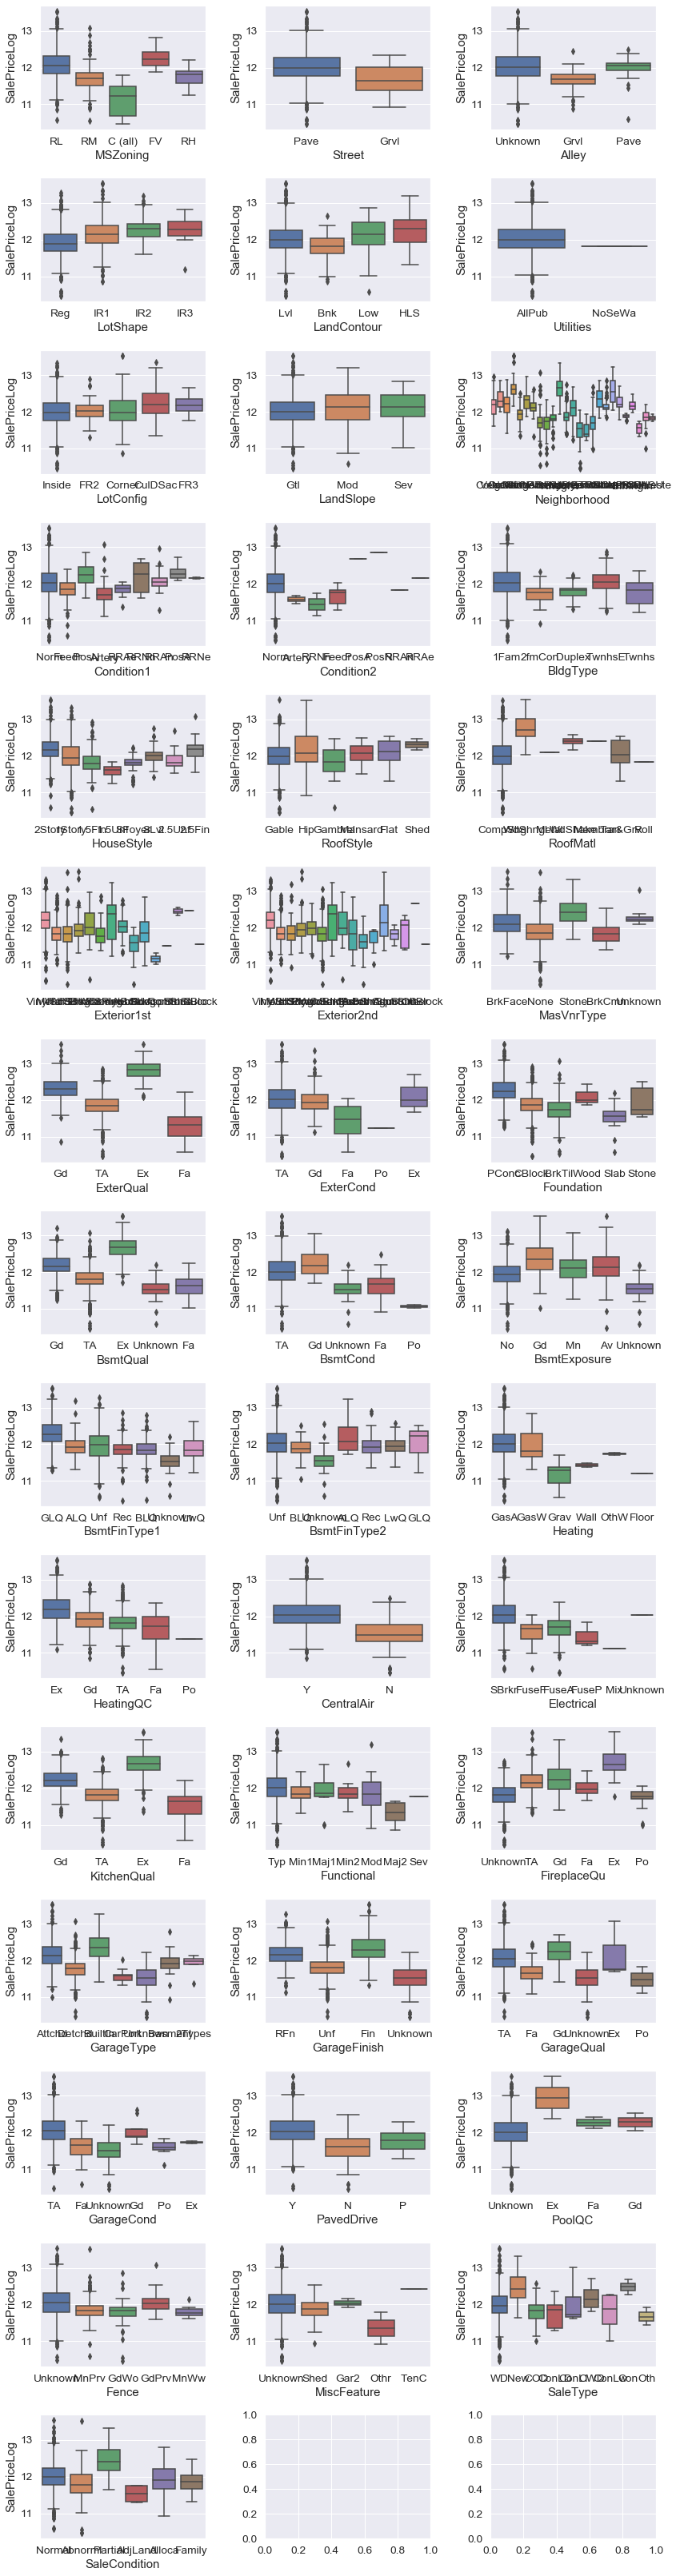

In [62]:
listofcatfeatures = NonNumerical
nrows = 15
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4,nrows*3))

for r in range(0,nrows):
    for c in range(0,ncols):  
        i = r*ncols+c
        if i < len(listofcatfeatures):
            sns.boxplot(x=listofcatfeatures[i], y=target, data=train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()

#### Identifying Correlation

From observation, the following Features seem to have good correlation with the SalePriceLog -
- MSZoning
- LotShape
- Neighborhood
- HouseStyle
- Foundation
- Condition2
- MasVnrType
- ExterQual
- ExterCond
- BsmtQual
- CentralAir
- Electrical
- KitchenQual
- SaleType
- SaleCondition

However, since their are no 'statistics' tp definitely say which ones are correlated, this turns out to be very subjective. Many other features which have considerably large 'Unknowns' have not been considered.

#### Listing Categorical Features that show good Correlation 

In [63]:
catg_strong_corr = [ 'MSZoning', 'LotShape', 'Neighborhood', 'HouseStyle', 'Foundation', 'Condition2', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType', 'SaleCondition']

In [64]:
catg_weak_corr = ['Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1',  'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature']

## 2. Data Wrangling

In this section, we will drop all features with a low correlation with the SalePrice, transform Categorical Data to Numerical Data and handle multicollinearity amongst features

### 2.1 Dropping Features with Low Correlation

In [65]:
to_drop_numerical = cols_bel_corr_limit
to_drop_categorical = catg_weak_corr

In [66]:
testId = test['Id']
features_to_drop = ['Id'] + to_drop_numerical + to_drop_categorical

In [67]:
for df in [train, test]:
    df.drop(features_to_drop, inplace = True, axis = 1)

### 2.2 Convert Categorical Data to Numerical Data

#### Understanding the Categorical Data Distribution
Here, we make violin plots and cat plots to understand the correlation between the selected categorical features and the SalePriceLog 

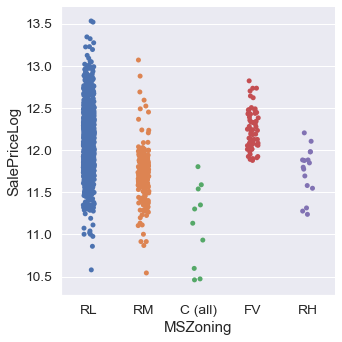

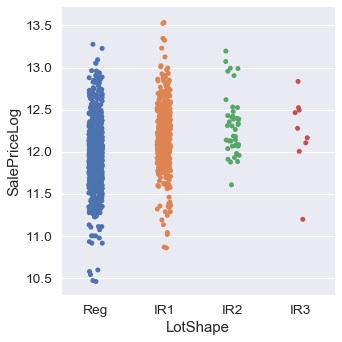

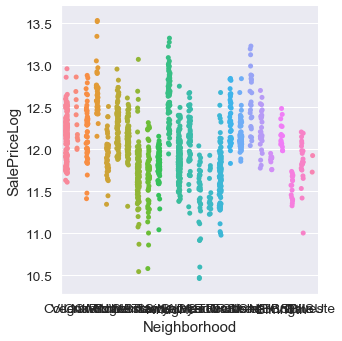

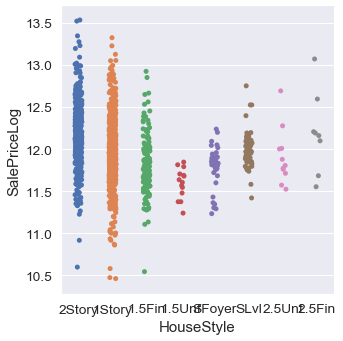

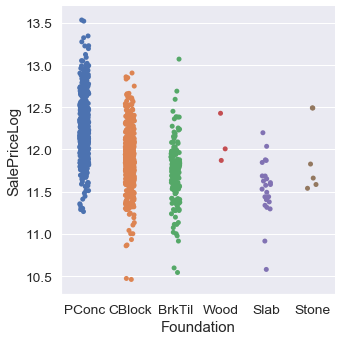

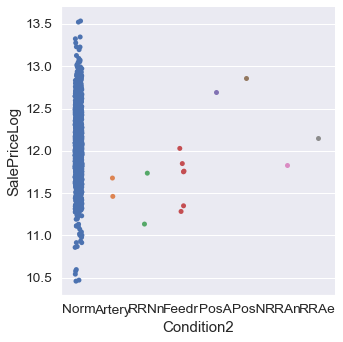

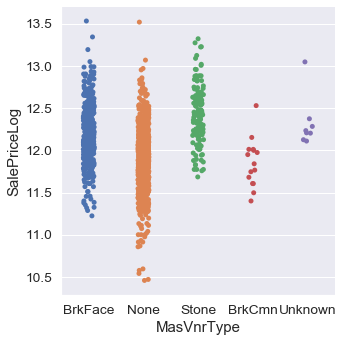

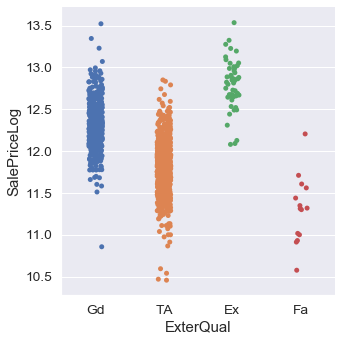

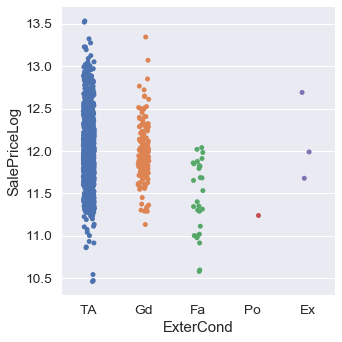

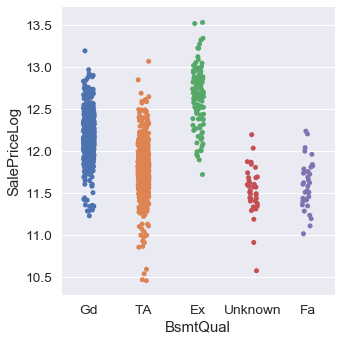

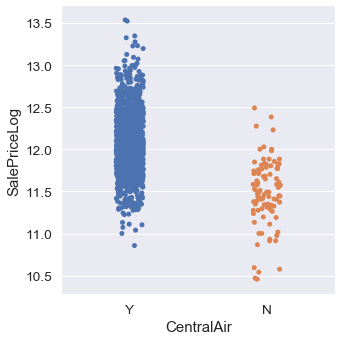

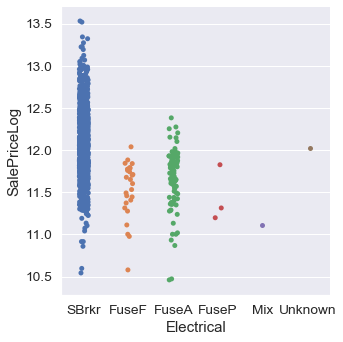

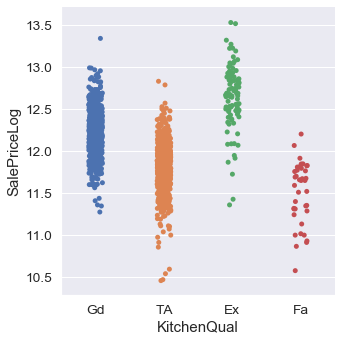

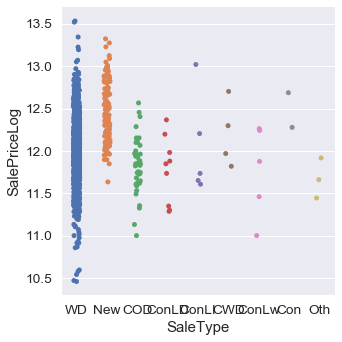

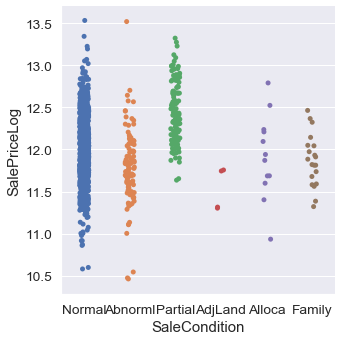

In [68]:
categories = catg_strong_corr.copy()
for category in categories:
    sns.catplot(x = category, y = target, data= train)
    plt.show()

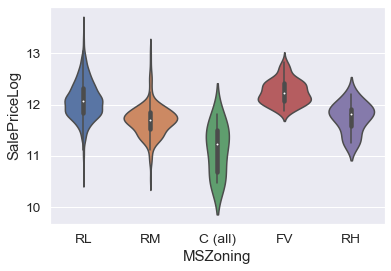

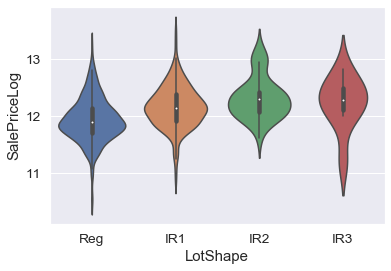

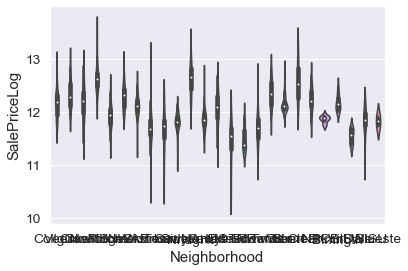

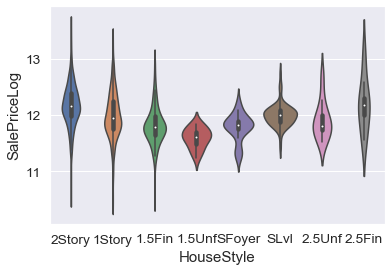

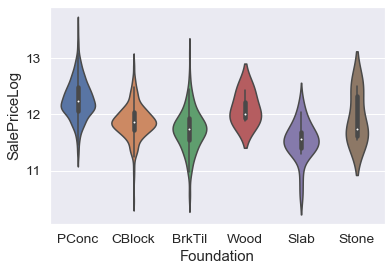

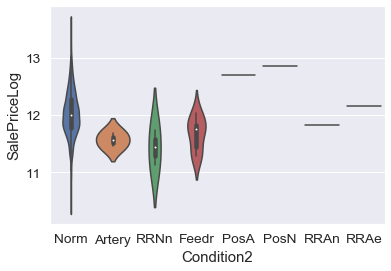

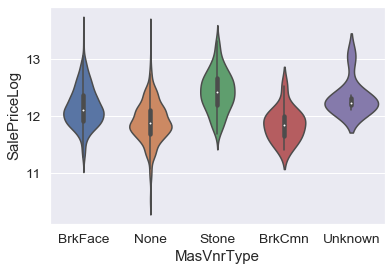

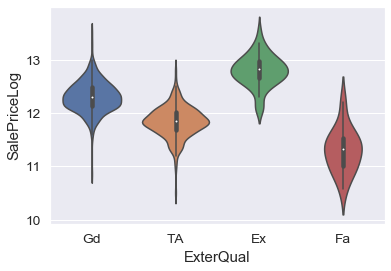

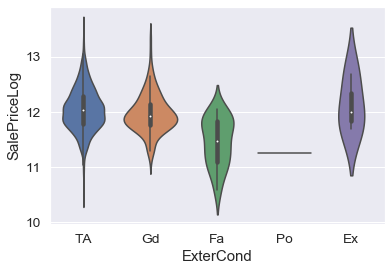

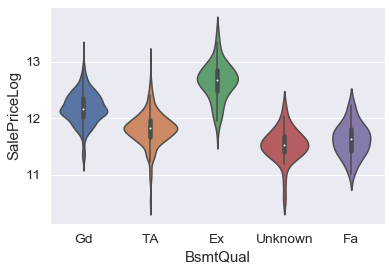

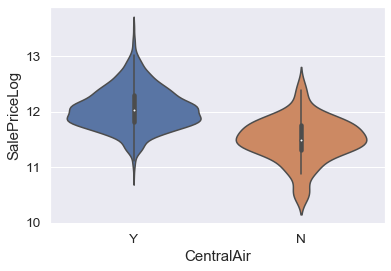

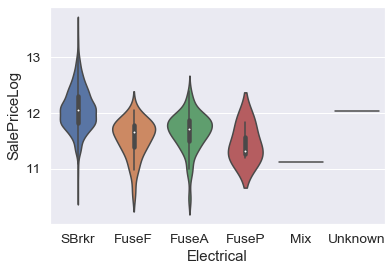

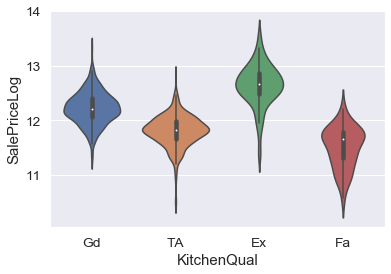

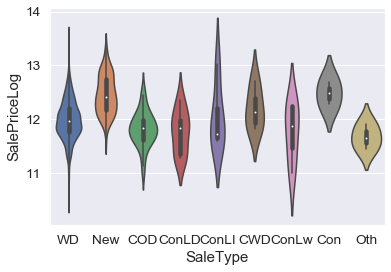

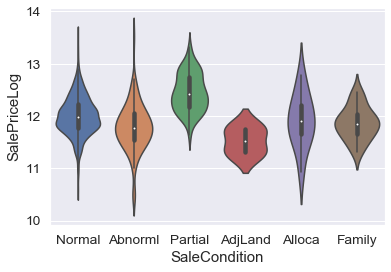

In [69]:
for category in categories:
    sns.violinplot(x = category, y = target, data= train)
    plt.show()

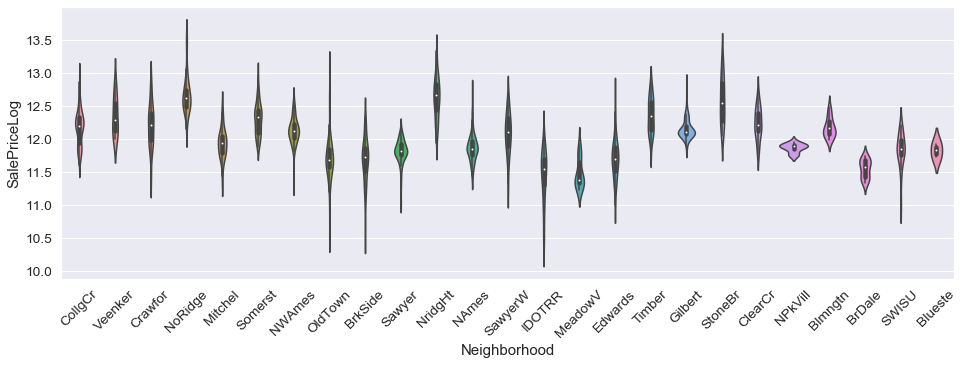

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=target, data=train, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [71]:
for category in categories :
    grp = train.groupby(category)[target].mean()
    print(grp)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085939
RM         11.692893
Name: SalePriceLog, dtype: float64
LotShape
IR1    12.163541
IR2    12.318450
IR3    12.230134
Reg    11.936094
Name: SalePriceLog, dtype: float64
Neighborhood
Blmngtn    12.169416
Blueste    11.826536
BrDale     11.547864
BrkSide    11.679727
ClearCr    12.239900
CollgCr    12.163641
Crawfor    12.206659
Edwards    11.705322
Gilbert    12.155803
IDOTRR     11.446889
MeadowV    11.474522
Mitchel    11.933948
NAmes      11.868045
NPkVill    11.866477
NWAmes     12.130609
NoRidge    12.676000
NridgHt    12.619411
OldTown    11.703865
SWISU      11.838435
Sawyer     11.811468
SawyerW    12.090689
Somerst    12.296495
StoneBr    12.585486
Timber     12.363455
Veenker    12.344176
Name: SalePriceLog, dtype: float64
HouseStyle
1.5Fin    11.813528
1.5Unf    11.595027
1Story    11.993683
2.5Fin    12.194451
2.5Unf    11.908751
2Story    12.183263
SFoyer    11.786479
SLvl      12.00

#### Dividing the Categories into Numerical Sub-Categories

By observation from the previously plotted graphs and mean data, we assign numerical values to sub categories of each Category.

In [72]:
# Neighborhood
neighborhood_2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
neighborhood_3 = ['NoRidge', 'NridgHt', 'StoneBr']

# HouseStyle
hs_2 = ['1.5Fin', '1.5Unf', 'SFoyer']
hs_3 = ['1Story', '2.5Fin', '2.5Unf', '2Story', 'SLvl']

# MSZoning
msz_2 = ['RM', 'RH']
msz_3 = ['RL', 'FV']

# Foundation
found_2 = ['BrkTil', 'CBlock', 'Slab', 'Stone']
found_3 = ['PConc', 'Wood']

# Condition2
cond_2 = ['Artery', 'Feeds', 'RRAn', 'RRNn']
cond_3 = ['Norm', 'RRAe']
cond_4 = ['PosA', 'PosN'] 

# SaleType
st_1 = ['Oth']
st_2 = ['CWD', 'ConLD', 'WD', 'ConLW', 'COD']
st_3 = ['New', 'Con', 'ConLI']

# SaleCondition
sc_1 = ['Abnormal']
sc_2 = ['AdjLand', 'Alloca']
sc_3 = ['Family', 'Normal', 'Partial']


At this point, we decide to drop LotShape, since it doesn't seem to be as dependent on SalePrice, given that all sub-categories have approximately same mean.

In [73]:
for df in [train, test]:
    df.drop(['LotShape'], inplace = True, axis = 1)

#### Encoding using the Numerical Subcategories

In [74]:
for df in [train, test]:
    df['MSZ_num'] = 1
    df.loc[(df['MSZoning'].isin(msz_2)), 'MSZ_num'] = 2
    df.loc[(df['MSZoning'].isin(msz_3)), 'MSZ_num'] = 3
    
    df['Neighborhood_num'] = 1
    df.loc[(df['Neighborhood'].isin(neighborhood_2)), 'Neighborhood_num'] = 2
    df.loc[(df['Neighborhood'].isin(neighborhood_3)), 'Neighborhood_num'] = 3
    
    df['HouseStyle_num'] = 1
    df.loc[(df['HouseStyle'].isin(hs_2)), 'HouseStyle_num'] = 2
    df.loc[(df['HouseStyle'].isin(hs_3)), 'HouseStyle_num'] = 3
    
    df['Condition2_num'] = 1
    df.loc[(df['Condition2'].isin(cond_2)), 'Condition2_num'] = 2
    df.loc[(df['Condition2'].isin(cond_3)), 'Condition2_num'] = 3
    df.loc[(df['Condition2'].isin(cond_4)), 'Condition2_num'] = 4
    
    df['Foundation_num'] = 1
    df.loc[(df['Foundation'].isin(found_2)), 'Foundation_num'] = 2
    df.loc[(df['Foundation'].isin(found_3)), 'Foundation_num'] = 3
    
    df['SaleType_num'] = 1
    df.loc[(df['SaleType'].isin(st_1)), 'SaleType_num'] = 1
    df.loc[(df['SaleType'].isin(st_2)), 'SaleType_num'] = 2
    df.loc[(df['SaleType'].isin(st_3)), 'SaleType_num'] = 3
    
    df['SaleCondition_num'] = 1
    df.loc[(df['SaleCondition'].isin(sc_1)), 'SaleCondition_num'] = 1
    df.loc[(df['SaleCondition'].isin(sc_2)), 'SaleCondition_num'] = 2
    df.loc[(df['SaleCondition'].isin(sc_3)), 'SaleCondition_num'] = 3
    
    df['MasVnr_num'] = 1
    df.loc[(df['MasVnrType'] == 'Stone'), 'MasVnr_num'] = 2
    
    df['ExterQual_num'] = 1
    df.loc[(df['ExterQual'] == 'TA'), 'ExterQual_num'] = 2
    df.loc[(df['ExterQual'] == 'Gd'), 'ExterQual_num'] = 3
    df.loc[(df['ExterQual'] == 'Ex'), 'ExterQual_num'] = 4
    
    df['ExterCond_num'] = 1
    df.loc[(df['ExterCond'] == 'TA'), 'ExterCond_num'] = 2
    df.loc[(df['ExterCond'] == 'Gd'), 'ExterCond_num'] = 3
    df.loc[(df['ExterCond'] == 'Ex'), 'ExterCond_num'] = 4
    
    df['BsmtQual_num'] = 1
    df.loc[(df['BsmtQual'] == 'TA'), 'BsmtQual_num'] = 2
    df.loc[(df['BsmtQual'] == 'Gd'), 'BsmtQual_num'] = 3
    df.loc[(df['BsmtQual'] == 'Ex'), 'BsmtQual_num'] = 4
    
    df['CentralAir_num'] = 0
    df.loc[(df['CentralAir'] == 'Y'), 'CentralAir_num'] = 1
    
    df['Electrical_num'] = 1
    df.loc[(df['Electrical']=='SBrKr'), 'Electrical_num'] = 2
    
    df['KitchenQual_num'] = 1
    df.loc[(df['KitchenQual'] == 'TA'), 'KitchenQual_num'] = 2
    df.loc[(df['KitchenQual'] == 'Gd'), 'KitchenQual_num'] = 3
    df.loc[(df['KitchenQual'] == 'Ex'), 'KitchenQual_num'] = 4
    
    

In [75]:
numerical_new = ['MSZ_num', 'Neighborhood_num', 'HouseStyle_num', 'Condition2_num', 'Foundation_num', 'SaleType_num', 'MasVnr_num', 'ExterQual_num', 'ExterCond_num', 'BsmtQual_num', 'CentralAir_num', 'Electrical_num', 'KitchenQual_num', 'SaleCondition_num']
train[numerical_new].head()

MSZ_num  Neighborhood_num  HouseStyle_num  Condition2_num  Foundation_num  \
0        3                 2               3               3               3   
1        3                 2               3               3               2   
2        3                 2               3               3               3   
3        3                 2               3               3               2   
4        3                 3               3               3               3   

   SaleType_num  MasVnr_num  ExterQual_num  ExterCond_num  BsmtQual_num  \
0             2           1              3              2             3   
1             2           1              2              2             3   
2             2           1              3              2             3   
3             2           1              2              2             2   
4             2           1              3              2             3   

   CentralAir_num  Electrical_num  KitchenQual_num  SaleCondition_num  
0               1               1                3                  3  
1               1               1                2                  3  
2               1               1                3                  3  
3               1               1                3                  1  
4               1               1                3                  3

In [76]:
test[numerical_new].head()

MSZ_num  Neighborhood_num  HouseStyle_num  Condition2_num  Foundation_num  \
0        3                 1               3               3               2   
1        3                 1               3               3               2   
2        3                 2               3               3               3   
3        3                 2               3               3               3   
4        3                 3               3               3               3   

   SaleType_num  MasVnr_num  ExterQual_num  ExterCond_num  BsmtQual_num  \
0             2           1              2              2             3   
1             2           1              2              2             3   
2             2           1              2              2             3   
3             2           1              2              2             2   
4             2           1              3              2             3   

   CentralAir_num  Electrical_num  KitchenQual_num  SaleCondition_num  
0               1               1                3                  3  
1               1               1                2                  3  
2               1               1                3                  3  
3               1               1                3                  3  
4               1               1                3                  3

### 2.3 Correlating Encoded Categorical Data with SalePrice

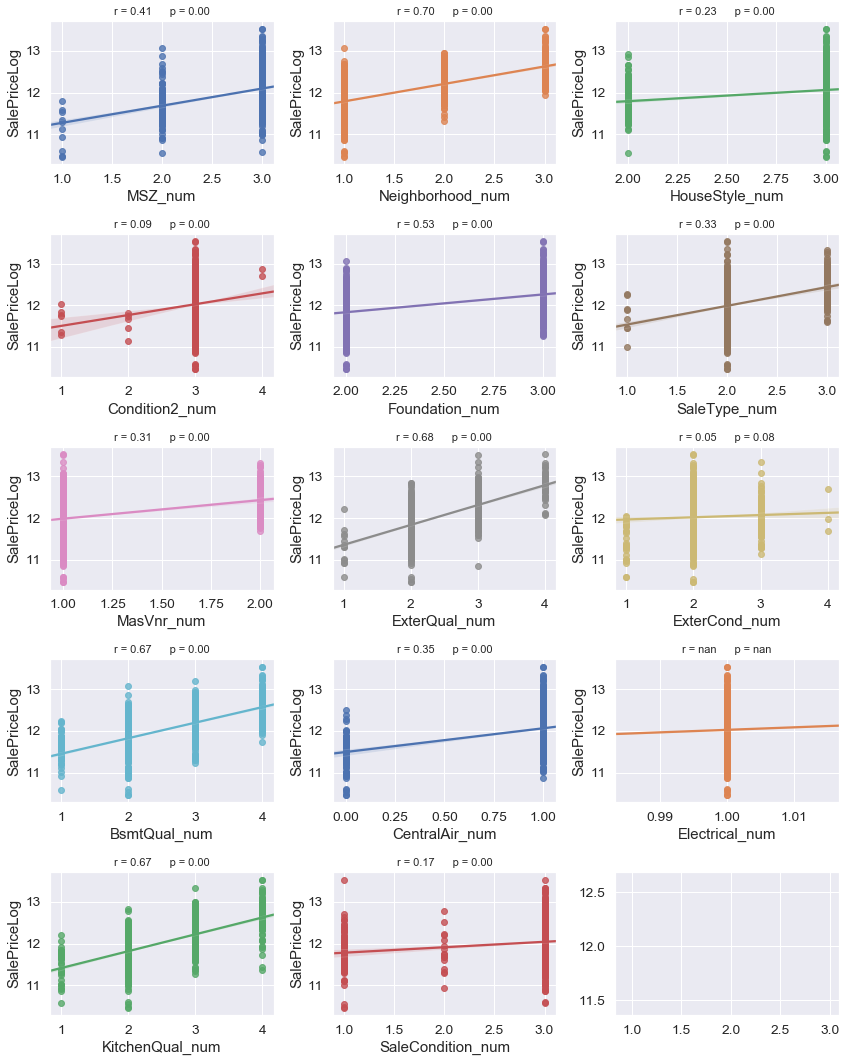

In [77]:
nrows = 5
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4,nrows*3))

for r in range(0,nrows):
    for c in range(0,ncols):  
        i = r*ncols+c
        if i < len(numerical_new):
            sns.regplot(train[numerical_new[i]], train[target], ax = axs[r][c])
            stp = stats.pearsonr(train[numerical_new[i]], train[target])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()

#### Identifying Correlation

The features that have a strong correlation with SalePrice are
- Neighborhood_num (0.70)
- Foundation_num (0.53)
- ExterQual_num (0.68)
- BsmtQual_num (0.67)
- KitchenQual_num (0.67)

#### Listing Features that show good correlation

In [78]:
categorical_strong_corr = ['Neighborhood_num', 'Foundation_num', 'ExterQual_num', 'BsmtQual_num', 'KitchenQual_num']
categorical_weak_corr = ['MSZ_num', 'HouseStyle_num', 'Condition2_num', 'SaleType_num', 'MasVnr_num', 'ExterCond_num', 'Electrical_num', 'KitchenQual_num']

#### Calculating Correlations

In [79]:
corr1 = train.corr()
corr_abs_1 = corr1.abs()

nr_all_cols = len(train)
set_corr_1 = corr_abs_1.nlargest(nr_all_cols, target)[target]

print(set_corr_1)

SalePriceLog         1.000000
SalePrice            0.948395
OverallQual          0.821404
GrLivAreaLog         0.737427
GrLivArea            0.725211
Neighborhood_num     0.696962
ExterQual_num        0.682225
GarageCars           0.681033
KitchenQual_num      0.669989
BsmtQual_num         0.667538
GarageArea           0.656128
TotalBsmtSF          0.647563
1stFlrSF             0.620500
FullBath             0.595899
YearBuilt            0.587043
YearRemodAdd         0.565992
TotRmsAbvGrd         0.537702
Foundation_num       0.531756
GarageYrBlt          0.499311
Fireplaces           0.491998
MasVnrArea           0.430569
MSZ_num              0.409423
LotAreaLog           0.402814
CentralAir_num       0.351598
SaleType_num         0.330219
MasVnr_num           0.313280
HouseStyle_num       0.233112
SaleCondition_num    0.169199
Condition2_num       0.094732
ExterCond_num        0.045941
MiscVal              0.020012
BsmtHalfBath         0.005124
BsmtFinSF2           0.004863
Name: Sale

In [80]:
cols_bel_corr_limit_1 = list(set_corr_1[set_corr_1.values <= 0.4].index)
cols_bel_corr_limit_1.append('Electrical_num')

In [81]:
cols_bel_corr_limit_1

['CentralAir_num',
 'SaleType_num',
 'MasVnr_num',
 'HouseStyle_num',
 'SaleCondition_num',
 'Condition2_num',
 'ExterCond_num',
 'MiscVal',
 'BsmtHalfBath',
 'BsmtFinSF2',
 'Electrical_num']

#### Dropping these Features

In [82]:
categories.remove('LotShape')
cols_to_drop = categories + cols_bel_corr_limit_1

In [83]:
for df in [train, test]:
    df.drop(cols_to_drop, inplace = True, axis = 1)

In [84]:
train.head()

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  \
0            7       2003          2003       196.0          856       856   
1            6       1976          1976         0.0         1262      1262   
2            7       2001          2002       162.0          920       920   
3            7       1915          1970         0.0          756       961   
4            8       2000          2000       350.0         1145      1145   

   GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  ...  SalePrice  \
0       1710         2             8           0  ...     208500   
1       1262         2             6           1  ...     181500   
2       1786         2             6           1  ...     223500   
3       1717         1             7           1  ...     140000   
4       2198         2             9           1  ...     250000   

   SalePriceLog  GrLivAreaLog  LotAreaLog  MSZ_num  Neighborhood_num  \
0     12.247694      7.444249    9.041922        3                 2   
1     12.109011      7.140453    9.169518        3                 2   
2     12.317167      7.487734    9.328123        3                 2   
3     11.849398      7.448334    9.164296        3                 2   
4     12.429216      7.695303    9.565214        3                 3   

   Foundation_num  ExterQual_num  BsmtQual_num  KitchenQual_num  
0               3              3             3                3  
1               2              2             3                2  
2               3              3             3                3  
3               2              2             2                3  
4               3              3             3                3  

[5 rows x 23 columns]

In [85]:
test.head()

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  \
0            5       1961          1961         0.0        882.0       896   
1            6       1958          1958       108.0       1329.0      1329   
2            5       1997          1998         0.0        928.0       928   
3            6       1998          1998        20.0        926.0       926   
4            8       1992          1992         0.0       1280.0      1280   

   GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  ...  GarageCars  GarageArea  \
0        896         1             5           0  ...         1.0       730.0   
1       1329         1             6           0  ...         1.0       312.0   
2       1629         2             6           1  ...         2.0       482.0   
3       1604         2             7           1  ...         2.0       470.0   
4       1280         2             5           0  ...         2.0       506.0   

   GrLivAreaLog  LotAreaLog  MSZ_num  Neighborhood_num  Foundation_num  \
0      6.797940    9.360655        3                 1               2   
1      7.192182    9.565704        3                 1               2   
2      7.395722    9.534595        3                 2               3   
3      7.380256    9.208138        3                 2               3   
4      7.154615    8.518193        3                 3               3   

   ExterQual_num  BsmtQual_num  KitchenQual_num  
0              2             3                3  
1              2             3                2  
2              2             3                3  
3              2             2                3  
4              3             3                3  

[5 rows x 21 columns]

#### Final Correlations

In [86]:
corr2 = train.corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(train)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, target)[target]

print(ser_corr_2)

SalePriceLog        1.000000
SalePrice           0.948395
OverallQual         0.821404
GrLivAreaLog        0.737427
GrLivArea           0.725211
Neighborhood_num    0.696962
ExterQual_num       0.682225
GarageCars          0.681033
KitchenQual_num     0.669989
BsmtQual_num        0.667538
GarageArea          0.656128
TotalBsmtSF         0.647563
1stFlrSF            0.620500
FullBath            0.595899
YearBuilt           0.587043
YearRemodAdd        0.565992
TotRmsAbvGrd        0.537702
Foundation_num      0.531756
GarageYrBlt         0.499311
Fireplaces          0.491998
MasVnrArea          0.430569
MSZ_num             0.409423
LotAreaLog          0.402814
Name: SalePriceLog, dtype: float64


#### Correlation Matrix: All Features
Let's confirm our findings by a correlation matrix

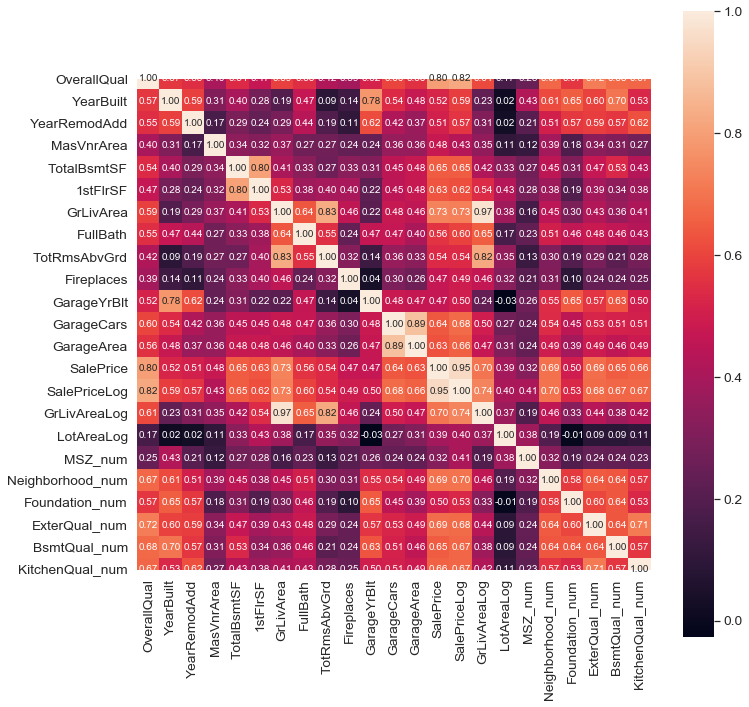

In [87]:
nr_f = len(train.columns)

corr = train.corr()
corr_abs = corr.abs()
cols = corr_abs.nlargest(nr_f, target)[target].index
cm = np.corrcoef(train[train.columns].values.T)

plt.figure(figsize=(nr_f/2, nr_f/2))
sns.set(font_scale=1.25)
sns.heatmap(cm, linewidths=0, annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 10}, 
            yticklabels=train.columns.values, xticklabels=train.columns.values
           )
plt.show()

### 2.4 Handling Multicollinearity

From the above Correlation Matrix, we can point out certain colliearity - i.e., features that are highly correlated to each other (apart from being correlated with the target).

Some of these pairs are -
- GrLivAreaLog and TotRmsAbvGrd (0.82)
- GarageCars and GarageArea (0.89)
- TotalBsmtSF and 1stFlrSF (0.80)
- YearBuilt and GarageYrBlt (0.78)

If we think rationally, these coorelations do make sense!

In [89]:
cols = corr_abs.nlargest(nr_all_cols, target)[target].index
cols = list(cols)

for col in ['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']:
    if col in cols:
        cols.remove(col)

In [90]:
print(cols)

['SalePriceLog', 'SalePrice', 'OverallQual', 'GrLivAreaLog', 'GrLivArea', 'Neighborhood_num', 'ExterQual_num', 'GarageCars', 'KitchenQual_num', 'BsmtQual_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Foundation_num', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotAreaLog']


In [92]:
features_final = cols.copy()
features_final.remove('SalePriceLog')
features_final.remove('SalePrice')

print(features_final)

['OverallQual', 'GrLivAreaLog', 'GrLivArea', 'Neighborhood_num', 'ExterQual_num', 'GarageCars', 'KitchenQual_num', 'BsmtQual_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Foundation_num', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotAreaLog']


### 2.5 StandardScaler

In [95]:
df_train = train[features_final].copy()
df_test = test[features_final].copy()

In [97]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_train_sc = sc.fit_transform(df_train)
df_test_sc = sc.fit_transform(df_test)

In [99]:
df_train_sc = pd.DataFrame(df_train_sc)
df_train_sc.head()

0         1         2         3         4         5         6  \
0  0.658506  0.539624  0.393013  0.658963  1.061109  0.313159  0.741127   
1 -0.068293 -0.380198 -0.489391  0.658963 -0.689001  0.313159 -0.770150   
2  0.658506  0.671287  0.542706  0.658963  1.061109  0.313159  0.741127   
3  0.658506  0.551993  0.406800  0.658963 -0.689001  1.652119  0.741127   
4  1.385305  1.299759  1.354202  2.162512  1.061109  1.652119  0.741127   

          7         8         9        10        11        12        13  \
0  0.646950 -0.473766  0.793546  1.052959  0.880362  1.118034 -0.952231   
1  0.646950  0.504925  0.793546  0.158428 -0.428115 -0.894427  0.605965   
2  0.646950 -0.319490  0.793546  0.986698  0.831900  1.118034  0.605965   
3 -0.752535 -0.714823 -1.025620 -1.862551 -0.718888 -0.894427  0.605965   
4  0.646950  0.222888  0.793546  0.953567  0.734975  1.118034  0.605965   

         14        15        16  
0  0.523937  0.438861 -0.129585  
1 -0.570739  0.438861  0.118848  
2  0.334044  0.438861  0.427653  
3 -0.570739  0.438861  0.108680  
4  1.384039  0.438861  0.889271

## 3. Building the Model

### 3.1 Finalising Dataset for Model

In [102]:
x = df_train.copy()
y = train[target]
X_test = df_test.copy()

X_sc = df_train_sc.copy()
Y_sc = train[target]
X_test_sc = df_test_sc.copy()

x.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 17 columns):
OverallQual         1458 non-null int64
GrLivAreaLog        1458 non-null float64
GrLivArea           1458 non-null int64
Neighborhood_num    1458 non-null int64
ExterQual_num       1458 non-null int64
GarageCars          1458 non-null int64
KitchenQual_num     1458 non-null int64
BsmtQual_num        1458 non-null int64
TotalBsmtSF         1458 non-null int64
FullBath            1458 non-null int64
YearBuilt           1458 non-null int64
YearRemodAdd        1458 non-null int64
Foundation_num      1458 non-null int64
Fireplaces          1458 non-null int64
MasVnrArea          1458 non-null float64
MSZ_num             1458 non-null int64
LotAreaLog          1458 non-null float64
dtypes: float64(3), int64(14)
memory usage: 205.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 17 columns):
OverallQual         1459 non-null int64
GrLivAr

In [103]:
x.head()

OverallQual  GrLivAreaLog  GrLivArea  Neighborhood_num  ExterQual_num  \
0            7      7.444249       1710                 2              3   
1            6      7.140453       1262                 2              2   
2            7      7.487734       1786                 2              3   
3            7      7.448334       1717                 2              2   
4            8      7.695303       2198                 3              3   

   GarageCars  KitchenQual_num  BsmtQual_num  TotalBsmtSF  FullBath  \
0           2                3             3          856         2   
1           2                2             3         1262         2   
2           2                3             3          920         2   
3           3                3             2          756         1   
4           3                3             3         1145         2   

   YearBuilt  YearRemodAdd  Foundation_num  Fireplaces  MasVnrArea  MSZ_num  \
0       2003          2003               3           0       196.0        3   
1       1976          1976               2           1         0.0        3   
2       2001          2002               3           1       162.0        3   
3       1915          1970               2           1         0.0        3   
4       2000          2000               3           1       350.0        3   

   LotAreaLog  
0    9.041922  
1    9.169518  
2    9.328123  
3    9.164296  
4    9.565214

In [104]:
X_sc.head()

0         1         2         3         4         5         6  \
0  0.658506  0.539624  0.393013  0.658963  1.061109  0.313159  0.741127   
1 -0.068293 -0.380198 -0.489391  0.658963 -0.689001  0.313159 -0.770150   
2  0.658506  0.671287  0.542706  0.658963  1.061109  0.313159  0.741127   
3  0.658506  0.551993  0.406800  0.658963 -0.689001  1.652119  0.741127   
4  1.385305  1.299759  1.354202  2.162512  1.061109  1.652119  0.741127   

          7         8         9        10        11        12        13  \
0  0.646950 -0.473766  0.793546  1.052959  0.880362  1.118034 -0.952231   
1  0.646950  0.504925  0.793546  0.158428 -0.428115 -0.894427  0.605965   
2  0.646950 -0.319490  0.793546  0.986698  0.831900  1.118034  0.605965   
3 -0.752535 -0.714823 -1.025620 -1.862551 -0.718888 -0.894427  0.605965   
4  0.646950  0.222888  0.793546  0.953567  0.734975  1.118034  0.605965   

         14        15        16  
0  0.523937  0.438861 -0.129585  
1 -0.570739  0.438861  0.118848  
2  0.334044  0.438861  0.427653  
3 -0.570739  0.438861  0.108680  
4  1.384039  0.438861  0.889271

In [105]:
X_test.head()

OverallQual  GrLivAreaLog  GrLivArea  Neighborhood_num  ExterQual_num  \
0            5      6.797940        896                 1              2   
1            6      7.192182       1329                 1              2   
2            5      7.395722       1629                 2              2   
3            6      7.380256       1604                 2              2   
4            8      7.154615       1280                 3              3   

   GarageCars  KitchenQual_num  BsmtQual_num  TotalBsmtSF  FullBath  \
0         1.0                3             3        882.0         1   
1         1.0                2             3       1329.0         1   
2         2.0                3             3        928.0         2   
3         2.0                3             2        926.0         2   
4         2.0                3             3       1280.0         2   

   YearBuilt  YearRemodAdd  Foundation_num  Fireplaces  MasVnrArea  MSZ_num  \
0       1961          1961               2           0         0.0        3   
1       1958          1958               2           0       108.0        3   
2       1997          1998               3           1         0.0        3   
3       1998          1998               3           1        20.0        3   
4       1992          1992               3           0         0.0        3   

   LotAreaLog  
0    9.360655  
1    9.565704  
2    9.534595  
3    9.208138  
4    8.518193

#### Model Tuning Mechanism

In [106]:
from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'

In [107]:
# source: towardsdatascience
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

### 3.2 Linear Regression

In [108]:
linreg = LinearRegression()
parameters = {'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}

grid_linear = GridSearchCV (linreg, parameters, cv=5, verbose=1, scoring = score_calc)
grid_linear.fit(x,y)
sc_linear = get_best_score(grid_linear)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.13482428830540363
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


In [109]:
linreg_sc = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid_linear_sc = GridSearchCV(linreg_sc, parameters, cv=5, verbose=1 , scoring = score_calc)
grid_linear_sc.fit(X_sc, y)
sc_linear_sc = get_best_score(grid_linear_sc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.13482428830540363
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


In [110]:
linregr_all = LinearRegression()
#linregr_all.fit(X_train_all, y_train_all)
linregr_all.fit(x, y)
pred_linreg_all = linregr_all.predict(X_test)
pred_linreg_all[pred_linreg_all < 0] = pred_linreg_all.mean()

In [117]:
sub_linreg = pd.DataFrame()
sub_linreg['Id'] = testId
sub_linreg['SalePrice'] = pred_linreg_all
sub_linreg['SalePrice'] = np.exp(sub_linreg['SalePrice'])
sub_linreg

Id      SalePrice
0     1461  122361.409583
1     1462  150296.134141
2     1463  184223.154326
3     1464  185906.447589
4     1465  196870.682198
...    ...            ...
1454  2915   98498.260656
1455  2916   99043.672240
1456  2917  164046.182872
1457  2918  125457.100476
1458  2919  220948.534553

[1459 rows x 2 columns]

### 3.3 RandomForestRegressor

In [114]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, refit=True, verbose=1, scoring = score_calc)
grid_rf.fit(x, y)

sc_rf = get_best_score(grid_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   15.2s finished


0.1467581943084208
{'min_samples_split': 4, 'n_estimators': 100, 'random_state': 5}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=5, verbose=0,
                      warm_start=False)


In [116]:
pred_rf = grid_rf.predict(X_test)

sub_rf = pd.DataFrame()
sub_rf['Id'] = testId
sub_rf['SalePrice'] = pred_rf 

sub_rf['SalePrice'] = np.exp(sub_rf['SalePrice'])
    
sub_rf

#sub_rf.to_csv('rf.csv',index=False)

Id      SalePrice
0     1461  125473.532872
1     1462  130370.803439
2     1463  191340.399622
3     1464  183971.409786
4     1465  198321.250793
...    ...            ...
1454  2915   85313.884245
1455  2916   86312.595865
1456  2917  157496.505519
1457  2918  111922.904491
1458  2919  226988.019786

[1459 rows x 2 columns]

### 3.4 DecisionTreeRegressor

In [119]:
from sklearn.tree import DecisionTreeRegressor

param_grid = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] , 'random_state': [5] }
            
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, refit=True, verbose=1, scoring = score_calc)
grid_dtree.fit(x, y)

sc_dtree = get_best_score(grid_dtree)

pred_dtree = grid_dtree.predict(X_test)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.18223918809004752
{'max_depth': 8, 'max_features': 13, 'max_leaf_nodes': None, 'min_samples_split': 20, 'presort': False, 'random_state': 5}
DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=13,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=5, splitter='best')


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   10.3s finished


In [123]:
dtree_pred = grid_dtree.predict(X_test)
sub_dtree = pd.DataFrame()
sub_dtree['Id'] = testId
sub_dtree['SalePrice'] = dtree_pred

sub_dtree['SalePrice'] = np.exp(sub_dtree['SalePrice'])
sub_dtree

Id      SalePrice
0     1461  122159.360866
1     1462  138609.863243
2     1463  213587.343163
3     1464  177954.813490
4     1465  176508.925511
...    ...            ...
1454  2915   89641.266642
1455  2916   89641.266642
1456  2917  149846.489907
1457  2918  101694.628549
1458  2919  199029.171955

[1459 rows x 2 columns]

## 4. Comparing the Three Models

In [124]:
list_scores = [sc_linear, sc_rf, sc_dtree]
list_model = ['Linear', 'RF', 'DTr']

### 4.1 Root Mean Square Error

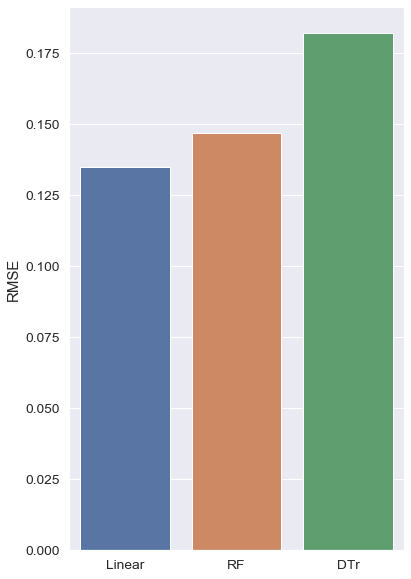

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 10)
sns.barplot(x=list_model, y=list_scores, ax=ax)
plt.ylabel('RMSE')
plt.show()